# HandWritten Digit Recognition

First DeepLearning project

In this project, we are using mnist dataset and try to train a neural network to do the digit classification

In [33]:
import numpy as np
import pandas as pd
import matplotlib as plt
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

print(tf.__version__)


2.13.0


load the mnist data

In [2]:
from tensorflow.keras.datasets import mnist

## load the mnist dataset

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Inspect the data

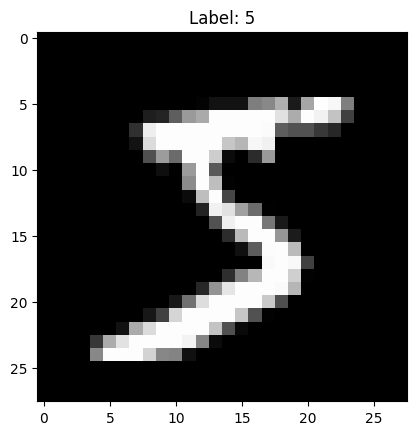

In [4]:
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

before we do anything, we have to remember to normalize the data

# Normalize the images to be values between 0 and 1

In [5]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

then,


# One-hot encode the labels

In [6]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

to understand how the data is structured, we print it

In [7]:
print(train_images)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [8]:
print(train_labels.shape)
print(train_images.shape)

(60000, 10)
(60000, 28, 28)


so each number is 28 pixels x 28 pixels

# 1. Now, we start to set up layers for it

we use relu functions as the activation function since is good and its simple,
easy for training and processing data

![Image](1_DfMRHwxY1gyyDmrIAd-gjQ.png)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense


model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images
    Dense(128, activation='relu'),  # Fully connected layer with 128 units and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 units (for 10 classes) with softmax activation
])

# 2. Complie the Model

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 3. Train the Model

In [11]:
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=32,
    validation_data=(test_images, test_labels)
)


Epoch 1/5
1875/1875 [==============================] - 2s 817us/step - loss: 0.2555 - accuracy: 0.9281 - val_loss: 0.1287 - val_accuracy: 0.9625
Epoch 2/5
1875/1875 [==============================] - 1s 761us/step - loss: 0.1095 - accuracy: 0.9682 - val_loss: 0.0963 - val_accuracy: 0.9700
Epoch 3/5
1875/1875 [==============================] - 1s 714us/step - loss: 0.0759 - accuracy: 0.9769 - val_loss: 0.0829 - val_accuracy: 0.9726
Epoch 4/5
1875/1875 [==============================] - 1s 694us/step - loss: 0.0575 - accuracy: 0.9820 - val_loss: 0.0816 - val_accuracy: 0.9748
Epoch 5/5
1875/1875 [==============================] - 1s 726us/step - loss: 0.0447 - accuracy: 0.9858 - val_loss: 0.0749 - val_accuracy: 0.9777


# 4. Evaluate the Model

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


313/313 [==============================] - 0s 418us/step - loss: 0.0749 - accuracy: 0.9777
Test Accuracy: 97.77%


## lets vitualize it

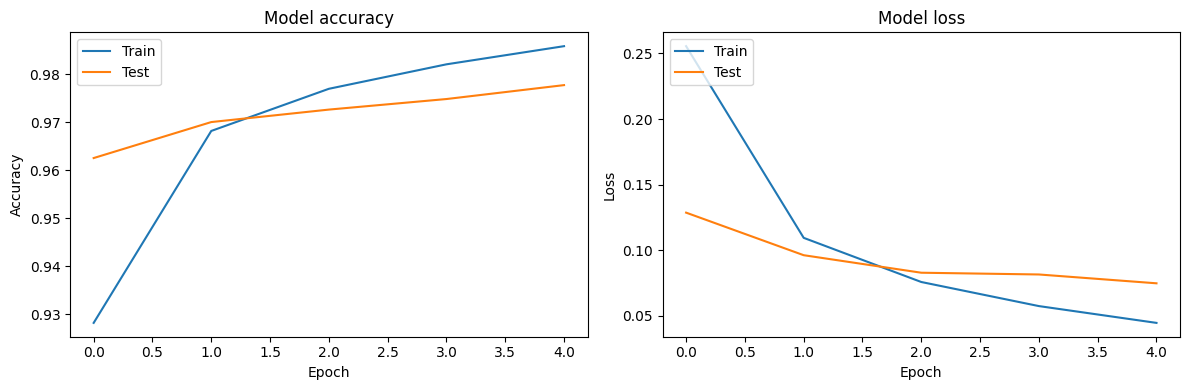

In [13]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


Great! we got 97% accuracy!

we can still do some improvments

In [14]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images
    Dense(256, activation='relu'),  # Fully connected layer with 128 units and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 units (for 10 classes) with softmax activation
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


now we change the epochs count to 10, but just in case we add early_stopping to avoid overfitting

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping], # put your callbacks in a list
    validation_data=(test_images, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 2s 837us/step - loss: 0.2265 - accuracy: 0.9342 - val_loss: 0.1143 - val_accuracy: 0.9652
Epoch 2/10
1875/1875 [==============================] - 1s 790us/step - loss: 0.0937 - accuracy: 0.9721 - val_loss: 0.0896 - val_accuracy: 0.9692
Epoch 3/10
1875/1875 [==============================] - 1s 782us/step - loss: 0.0622 - accuracy: 0.9815 - val_loss: 0.0675 - val_accuracy: 0.9786
Epoch 4/10
1875/1875 [==============================] - 1s 795us/step - loss: 0.0438 - accuracy: 0.9866 - val_loss: 0.0682 - val_accuracy: 0.9785
Epoch 5/10
1875/1875 [==============================] - 2s 822us/step - loss: 0.0347 - accuracy: 0.9889 - val_loss: 0.0706 - val_accuracy: 0.9780
Epoch 6/10
1875/1875 [==============================] - 2s 829us/step - loss: 0.0247 - accuracy: 0.9922 - val_loss: 0.0760 - val_accuracy: 0.9775
Epoch 7/10
1875/1875 [==============================] - 2s 801us/step - loss: 0.0196 - accuracy: 0.9936 - val_loss: 0.0744 -

Great! almost 100% accuracy, lets try further with higher epoches

In [16]:
history = model.fit(
    train_images,
    train_labels,
    epochs=15,
    batch_size=32,
    callbacks=[early_stopping], # put your callbacks in a list
    validation_data=(test_images, test_labels)
)

Epoch 1/15
1875/1875 [==============================] - 2s 838us/step - loss: 0.0098 - accuracy: 0.9968 - val_loss: 0.0725 - val_accuracy: 0.9830
Epoch 2/15
1875/1875 [==============================] - 2s 823us/step - loss: 0.0094 - accuracy: 0.9967 - val_loss: 0.0832 - val_accuracy: 0.9801
Epoch 3/15
1875/1875 [==============================] - 2s 840us/step - loss: 0.0080 - accuracy: 0.9973 - val_loss: 0.0831 - val_accuracy: 0.9815
Epoch 4/15
1875/1875 [==============================] - 2s 836us/step - loss: 0.0070 - accuracy: 0.9976 - val_loss: 0.0913 - val_accuracy: 0.9792
Epoch 5/15
1875/1875 [==============================] - 1s 788us/step - loss: 0.0061 - accuracy: 0.9981 - val_loss: 0.0992 - val_accuracy: 0.9785
Epoch 6/15
1875/1875 [==============================] - 1s 791us/step - loss: 0.0050 - accuracy: 0.9985 - val_loss: 0.0985 - val_accuracy: 0.9808
Epoch 7/15
1875/1875 [==============================] - 1s 785us/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 0.1078 -

it seems if I directly use another fit functions, the loss start as where I ended last time, which might suggest that it trains again on the model I have just trained

If we want to avoid it, I guess we should start it over

In [28]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images
    Dense(128, activation='relu'),  # Fully connected layer with 128 units and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 units (for 10 classes) with softmax activation
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)
history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping], # put your callbacks in a list
    validation_data=(test_images, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 1s 696us/step - loss: 0.2561 - accuracy: 0.9274 - val_loss: 0.1318 - val_accuracy: 0.9618
Epoch 2/10
1875/1875 [==============================] - 1s 673us/step - loss: 0.1139 - accuracy: 0.9664 - val_loss: 0.0943 - val_accuracy: 0.9717
Epoch 3/10
1875/1875 [==============================] - 1s 713us/step - loss: 0.0772 - accuracy: 0.9766 - val_loss: 0.0832 - val_accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 1s 660us/step - loss: 0.0570 - accuracy: 0.9829 - val_loss: 0.0814 - val_accuracy: 0.9760
Epoch 5/10
1875/1875 [==============================] - 1s 659us/step - loss: 0.0454 - accuracy: 0.9858 - val_loss: 0.0796 - val_accuracy: 0.9758
Epoch 6/10
1875/1875 [==============================] - 1s 659us/step - loss: 0.0356 - accuracy: 0.9887 - val_loss: 0.0813 - val_accuracy: 0.9760
Epoch 7/10
1875/1875 [==============================] - 1s 657us/step - loss: 0.0287 - accuracy: 0.9913 - val_loss: 0.0810 -

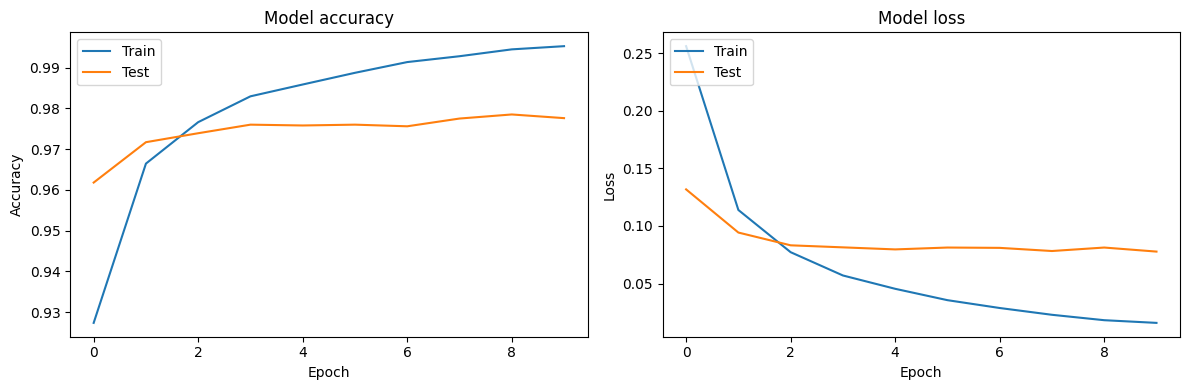

In [29]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

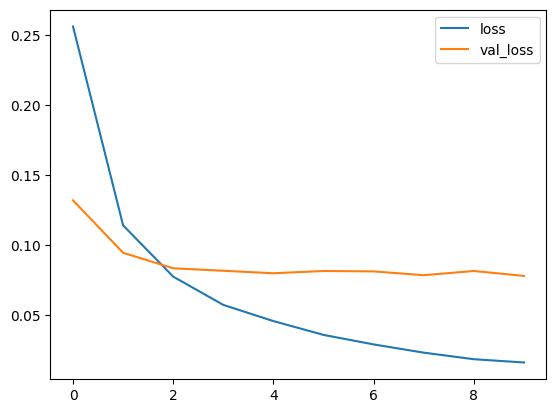

In [34]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [19]:
history.history

{'loss': [0.22070597112178802,
  0.09154766798019409,
  0.06130516901612282,
  0.04478169232606888,
  0.03293851763010025,
  0.025184987112879753,
  0.019530057907104492,
  0.01601477712392807,
  0.01281061489135027,
  0.010680190287530422,
  0.009442095644772053,
  0.008974487893283367,
  0.007534516975283623,
  0.007101559080183506,
  0.006281865295022726],
 'accuracy': [0.9360666871070862,
  0.9730833172798157,
  0.9814833402633667,
  0.9863499999046326,
  0.989983320236206,
  0.9916666746139526,
  0.9935666918754578,
  0.9950666427612305,
  0.9958999752998352,
  0.996483325958252,
  0.9971833229064941,
  0.9970333576202393,
  0.9974666833877563,
  0.9975166916847229,
  0.9977666735649109],
 'val_loss': [0.11028121411800385,
  0.08852854371070862,
  0.07909859716892242,
  0.0747181624174118,
  0.07619019597768784,
  0.06984405219554901,
  0.06666118651628494,
  0.07518196105957031,
  0.08322479575872421,
  0.0868171975016594,
  0.08774709701538086,
  0.08541646599769592,
  0.1110140

well, it seems that loss and the accuracy still have some space to impove since they are not following to the trend of train.

# OK, now its time to see if this model acctually works,

## Lets Predict

Make Predictions:

Use the predict method of your trained model to get predictions. This method will return the predicted probabilities for each class

predictions will be an array with shape (number_of_samples, number_of_classes). Each row will contain the predicted probabilities for each class.

In [35]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 323us/step


Get Predicted Classes:

If we want to get the class with the highest probability for each sample (i.e., the predicted class label), we can use np.argmax:

In [36]:
predicted_labels = np.argmax(predictions, axis=1)


## Visualize Predictions

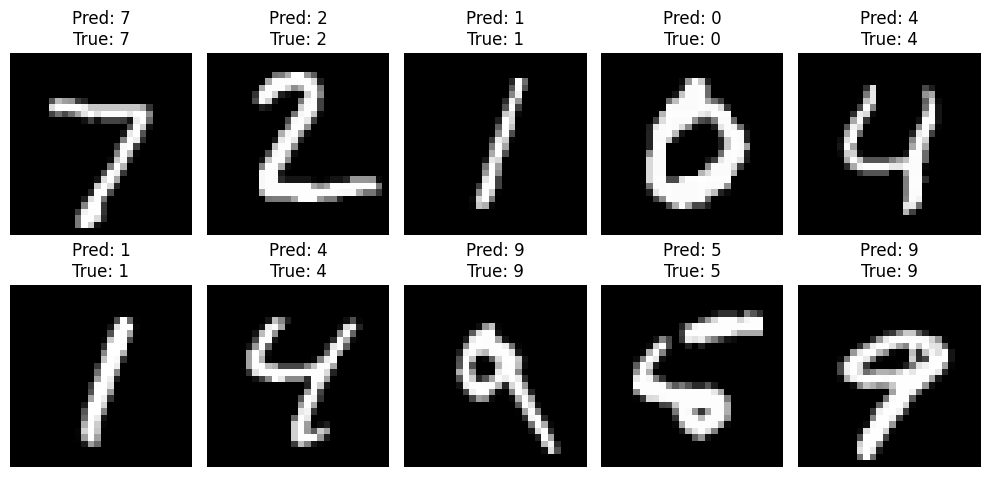

In [37]:
# Visualize the first 10 predictions
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {np.argmax(test_labels[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## Evaluate Prediction Accuracy 

In [38]:
accuracy = np.mean(predicted_labels == np.argmax(test_labels, axis=1))
print(f"Prediction accuracy: {accuracy * 100:.2f}%")


Prediction accuracy: 97.76%
